# E-value 
Find the e-value corresponding to a minimum length and maximum error rate limit

In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import cv2

In [3]:
c_darkblue = "#4c6c9c"
c_darkgreen = "#5e8f7b"
c_darkpurple = "#5b218a"

In [19]:
min_len = 100
max_err = 0.033
#ref_len = 2728222896 # mouse
ref_len = 3209458048 # human
#bins = 1024
#query_len = 144133524 # fly
query_len = 2728222896 # mouse
#query_seg = 20000

In [20]:
match = 1
mismatch = 2
param_lambda = 1.28
param_K = 0.46
param_alpha = 1.5
param_beta = -2

In [21]:
def raw_score(match, mismatch, errors, match_len):
    return (match_len - errors)*match - errors*mismatch

In [22]:
def calc_evalue(K, m, n, lam, S):    
    return K * m * n * math.exp(-lam * S)

In [23]:
errors = round(min_len * max_err)
S = raw_score(match, mismatch, errors, min_len)
calc_evalue(param_K, ref_len, query_len, param_lambda, S)

1.0433935126543479e-32

In [92]:
evalues = []
min_lens = list(range(20, 200, 10))
for errors in range(1, 11):
    err_evalues = []
    for l in min_lens:
        S = raw_score(match, mismatch, errors, l)
        err_evalues.append(calc_evalue(param_K, ref_len, query_len, param_lambda, S))
    evalues.append(err_evalues)

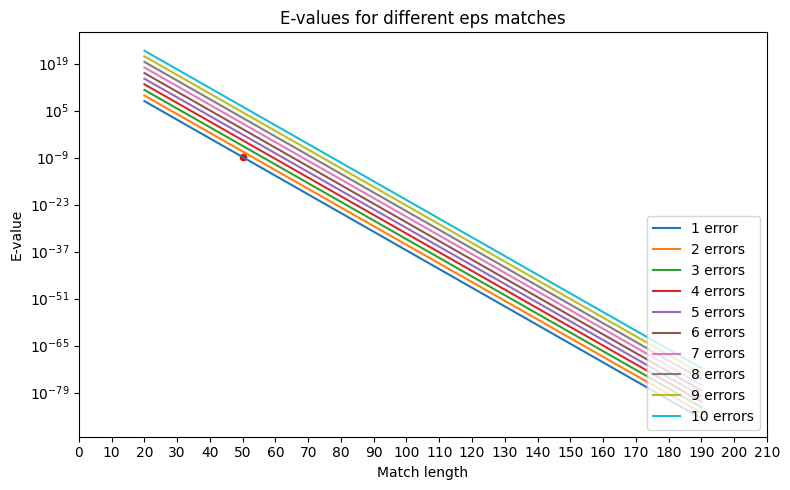

In [93]:
plt.figure(figsize=(8, 5))


plt.plot(min_lens, evalues[0], label = "1 error")
for errors in range(2, 11):
    plt.plot(min_lens, evalues[errors - 1], label = str(errors) + " errors")

plt.scatter([50], [stellar_evalue], sizes=[20], color = "red")

plt.xticks(list(range(0, 220, 10)))
plt.xlabel("Match length")
plt.ylabel("E-value")
plt.yscale("log")
plt.title("E-values for different eps matches")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.savefig('evalues.png', dpi = 250)
plt.show()

In [202]:
evalues = []
min_lens = list(range(40, 220, 10))
errors = list(range(20, 0, -1))
for err in errors:
    err_evalues = []
    for l in min_lens:
        S = raw_score(match, mismatch, err, l)
        err_evalues.append(calc_evalue(param_K, ref_len, query_len, param_lambda, S))
    evalues.append(err_evalues)

In [203]:
df = pd.DataFrame(data = evalues, columns = min_lens, index = errors)
df

,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210
20,2.373239e+28,6.551972e+22,1.808851e+17,4.993825e+11,1.378682e+06,3.806226e+00,1.050812e-05,2.901054e-11,8.009151e-17,2.211144e-22,6.104467e-28,1.685304e-33,4.652742e-39,1.284516e-44,3.546257e-50,9.790410e-56,2.702910e-61,7.462119e-67
19,5.100945e+26,1.408255e+21,3.887871e+15,1.073353e+10,2.963283e+04,8.180951e-02,2.258574e-07,6.235410e-13,1.721455e-18,4.752546e-24,1.312070e-29,3.622326e-35,1.000042e-40,2.760888e-46,7.622184e-52,2.104312e-57,5.809526e-63,1.603878e-68
18,1.096377e+25,3.026847e+19,8.356435e+13,2.307022e+08,6.369162e+02,1.758381e-03,4.854490e-09,1.340214e-14,3.700027e-20,1.021493e-25,2.820110e-31,7.785684e-37,2.149450e-42,5.934143e-48,1.638282e-53,4.522924e-59,1.248676e-64,3.447312e-70
17,2.356508e+23,6.505784e+17,1.796099e+12,4.958621e+06,1.368962e+01,3.779394e-05,1.043405e-10,2.880603e-16,7.952690e-22,2.195557e-27,6.061433e-33,1.673424e-38,4.619943e-44,1.275461e-49,3.521258e-55,9.721392e-61,2.683855e-66,7.409514e-72
16,5.064985e+21,1.398327e+16,3.860463e+10,1.065786e+05,2.942393e-01,8.123278e-07,2.242652e-12,6.191453e-18,1.709319e-23,4.719042e-29,1.302820e-34,3.596790e-40,9.929920e-46,2.741425e-51,7.568451e-57,2.089477e-62,5.768572e-68,1.592571e-73
15,1.088648e+20,3.005509e+14,8.297526e+08,2.290758e+03,6.324263e-03,1.745985e-08,4.820268e-14,1.330766e-19,3.673943e-25,1.014292e-30,2.800230e-36,7.730798e-42,2.134297e-47,5.892310e-53,1.626733e-58,4.491039e-64,1.239874e-69,3.423010e-75
14,2.339896e+18,6.459921e+12,1.783437e+07,4.923665e+01,1.359312e-04,3.752751e-10,1.036049e-15,2.860296e-21,7.896627e-27,2.180079e-32,6.018702e-38,1.661627e-43,4.587374e-49,1.266470e-54,3.496435e-60,9.652861e-66,2.664935e-71,7.357280e-77
13,5.029279e+16,1.388470e+11,3.833249e+05,1.058273e+00,2.921651e-06,8.066013e-12,2.226843e-17,6.147806e-23,1.697269e-28,4.685775e-34,1.293636e-39,3.571435e-45,9.859919e-51,2.722099e-56,7.515097e-62,2.074747e-67,5.727906e-73,1.581344e-78
12,1.080973e+15,2.984321e+09,8.239032e+03,2.274609e-02,6.279679e-08,1.733677e-13,4.786287e-19,1.321385e-24,3.648043e-30,1.007142e-35,2.780489e-41,7.676299e-47,2.119252e-52,5.850772e-58,1.615265e-63,4.459379e-69,1.231133e-74,3.398879e-80
11,2.323401e+13,6.414381e+07,1.770865e+02,4.888955e-04,1.349729e-09,3.726295e-15,1.028745e-20,2.840132e-26,7.840959e-32,2.164710e-37,5.976273e-43,1.649913e-48,4.555035e-54,1.257542e-59,3.471786e-65,9.584812e-71,2.646149e-76,7.305415e-82


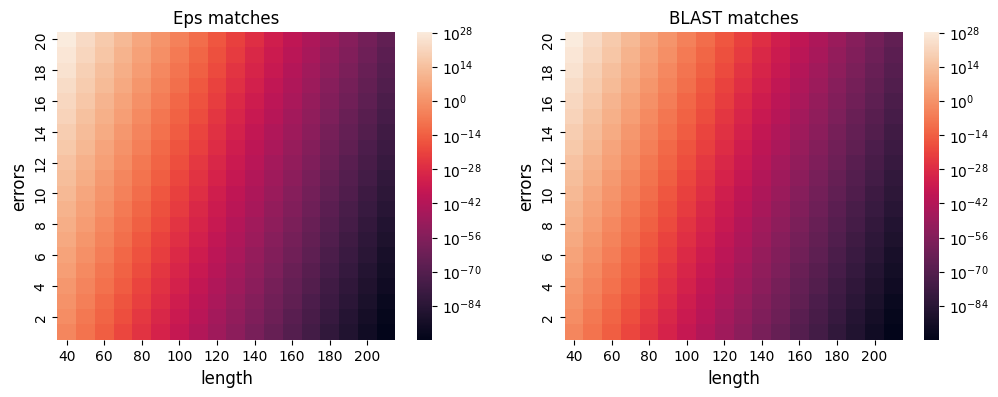

In [210]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)
s = sns.heatmap(df, ax = axs[0], yticklabels = 2, xticklabels = 2, norm=LogNorm())
s.set_xlabel('length', fontsize=12)
s.set_ylabel('errors', fontsize=12)
s.set_title("Eps matches")

b = sns.heatmap(df, ax = axs[1], yticklabels = 2, xticklabels = 2, norm=LogNorm())
b.set_xlabel('length', fontsize=12)
b.set_ylabel('errors', fontsize=12)
b.set_title("BLAST matches")

fig.savefig('evalues.heatmap.png', dpi=400, bbox_inches='tight')
plt.show()